In [17]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable




batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.33,random_state=42)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_cv =x_cv.astype('float32')
x_train /= 255
x_cv /=255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_cv.shape[0],'validation samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_cv   = keras.utils.to_categorical(y_cv,num_classes)

x_train shape: (40200, 28, 28, 1)
40200 train samples
19800 validation samples
10000 test samples


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

CNN WITH THREE CONV LAYERS(350-225-150)

Without dropout and BatchNormalization kernel size (3,3)

In [80]:
cnn_with_3_1 = Sequential()
cnn_with_3_1.add(Conv2D(350, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_1.add(Conv2D(225, (3, 3), activation='relu'))
cnn_with_3_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_1.add(Conv2D(150, (3, 3), activation='relu'))
cnn_with_3_1.add(Flatten())
cnn_with_3_1.add(Dense(128, activation='relu'))
cnn_with_3_1.add(Dense(num_classes, activation='softmax'))

cnn_with_3_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history31=cnn_with_3_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 26s 652us/step - loss: 0.2655 - acc: 0.9212 - val_loss: 0.0750 - val_acc: 0.9773
Epoch 2/12
40200/40200 [==============================] - 20s 491us/step - loss: 0.0502 - acc: 0.9843 - val_loss: 0.0555 - val_acc: 0.9825
Epoch 3/12
40200/40200 [==============================] - 20s 496us/step - loss: 0.0283 - acc: 0.9917 - val_loss: 0.0432 - val_acc: 0.9869
Epoch 4/12
40200/40200 [==============================] - 20s 502us/step - loss: 0.0186 - acc: 0.9941 - val_loss: 0.0468 - val_acc: 0.9870
Epoch 5/12
40200/40200 [==============================] - 20s 503us/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0377 - val_acc: 0.9896
Epoch 6/12
40200/40200 [==============================] - 20s 507us/step - loss: 0.0084 - acc: 0.9977 - val_loss: 0.0459 - val_acc: 0.9886
Epoch 7/12
40200/40200 [==============================] - 20s 509us/step - loss: 0.0059 - acc: 0.9983 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.037850331771943004
Test accuracy: 0.992


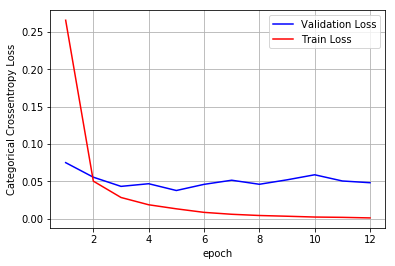

<IPython.core.display.Javascript object>

In [90]:
score31 = cnn_with_3_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score31[0]) 
print('Test accuracy:', score31[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))


vy = history31.history['val_loss']
ty = history31.history['loss']

x = PrettyTable()

x.field_names = ["CNN","Type", "Train_accuracy","validation_accuracy","Test_accuracy","Train_loss","validation_loss" ,"Test_loss"]

x.add_row(["350-225-150(kernel(3,3))","Without_bn_dropout" ,history31.history['acc'][11],history31.history['val_acc'][11],score31[1],history31.history['loss'][11],history31.history['val_loss'][11],score31[0]])
plt_dynamic(l, vy, ty, ax)

without dropout  and BatchNormalization,kernelsize(5,5)

In [91]:
cnn_with_3_2 = Sequential()
cnn_with_3_2.add(Conv2D(350, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_2.add(Conv2D(225, (5, 5), activation='relu'))
cnn_with_3_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_2.add(Conv2D(150, (5, 5), activation='relu'))
cnn_with_3_2.add(Flatten())
cnn_with_3_2.add(Dense(128, activation='relu'))
cnn_with_3_2.add(Dense(num_classes, activation='softmax'))

cnn_with_3_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history32=cnn_with_3_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_2.evaluate(x_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 28s 707us/step - loss: 0.2623 - acc: 0.9191 - val_loss: 0.0851 - val_acc: 0.9740
Epoch 2/12
40200/40200 [==============================] - 22s 557us/step - loss: 0.0478 - acc: 0.9848 - val_loss: 0.0448 - val_acc: 0.9856
Epoch 3/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0278 - acc: 0.9912 - val_loss: 0.0707 - val_acc: 0.9815
Epoch 4/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0429 - val_acc: 0.9877
Epoch 5/12
40200/40200 [==============================] - 22s 557us/step - loss: 0.0131 - acc: 0.9964 - val_loss: 0.0363 - val_acc: 0.9908
Epoch 6/12
40200/40200 [==============================] - 22s 557us/step - loss: 0.0092 - acc: 0.9973 - val_loss: 0.0406 - val_acc: 0.9899
Epoch 7/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0067 - acc: 0.9981 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.053618895091483085
Test accuracy: 0.9901010100769274


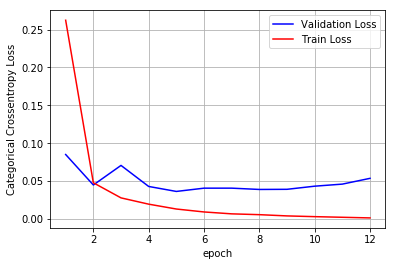

<IPython.core.display.Javascript object>

In [92]:
score32 = cnn_with_3_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

x.add_row(["350-225-150(kernel(5,5))","Without_bn_dropout" ,history32.history['acc'][11],history32.history['val_acc'][11],score32[1],history32.history['loss'][11],history32.history['val_loss'][11],score32[0]])

vy = history32.history['val_loss']
ty = history32.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.3)

In [93]:
cnn_with_3_3 = Sequential()
cnn_with_3_3.add(Conv2D(350, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_3.add(Conv2D(225, (5, 5), activation='relu'))
cnn_with_3_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_3.add(Dropout(0.3))
cnn_with_3_3.add(Conv2D(150, (5, 5), activation='relu'))
cnn_with_3_3.add(Dropout(0.3))
cnn_with_3_3.add(Flatten())
cnn_with_3_3.add(Dense(128, activation='relu'))
cnn_with_3_3.add(Dense(num_classes, activation='softmax'))

cnn_with_3_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history33=cnn_with_3_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_3.evaluate(x_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 29s 725us/step - loss: 0.2694 - acc: 0.9164 - val_loss: 0.2334 - val_acc: 0.9248
Epoch 2/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.0624 - val_acc: 0.9824
Epoch 3/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.0416 - val_acc: 0.9880
Epoch 4/12
40200/40200 [==============================] - 23s 561us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0353 - val_acc: 0.9895
Epoch 5/12
40200/40200 [==============================] - 23s 572us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.1328 - val_acc: 0.9664
Epoch 6/12
40200/40200 [==============================] - 23s 579us/step - loss: 0.0163 - acc: 0.9948 - val_loss: 0.0427 - val_acc: 0.9878
Epoch 7/12
40200/40200 [==============================] - 23s 581us/step - loss: 0.0121 - acc: 0.9964 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.03640687935328967
Test accuracy: 0.9921717171717171


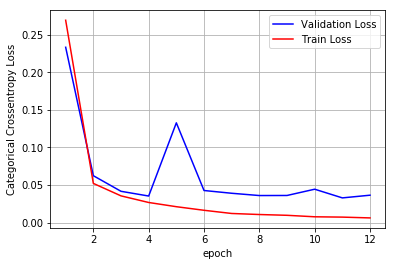

<IPython.core.display.Javascript object>

In [95]:
score33 = cnn_with_3_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score33[0]) 
print('Test accuracy:', score33[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

x.add_row(["350-225-150(kernel(5,5))","With_dropout(0,3)" ,history33.history['acc'][11],history33.history['val_acc'][11],score33[1],history33.history['loss'][11],history33.history['val_loss'][11],score33[0]])


vy = history33.history['val_loss']
ty = history33.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout(0.4)

In [0]:
cnn_with_3_4 = Sequential()
cnn_with_3_4.add(Conv2D(350, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_4.add(Conv2D(225, (5, 5), activation='relu'))
cnn_with_3_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_4.add(Dropout(0.4))
cnn_with_3_4.add(Conv2D(150, (5, 5), activation='relu'))
cnn_with_3_4.add(Dropout(0.4))
cnn_with_3_4.add(Flatten())
cnn_with_3_4.add(Dense(128, activation='relu'))
cnn_with_3_4.add(Dense(num_classes, activation='softmax'))

cnn_with_3_4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history34=cnn_with_3_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_4.evaluate(x_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 29s 721us/step - loss: 0.2498 - acc: 0.9210 - val_loss: 0.0592 - val_acc: 0.9824
Epoch 2/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.1245 - val_acc: 0.9670
Epoch 3/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0388 - acc: 0.9877 - val_loss: 0.0369 - val_acc: 0.9894
Epoch 4/12
40200/40200 [==============================] - 22s 559us/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0366 - val_acc: 0.9894
Epoch 5/12
40200/40200 [==============================] - 23s 569us/step - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0315 - val_acc: 0.9908
Epoch 6/12
40200/40200 [==============================] - 23s 580us/step - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0319 - val_acc: 0.9909
Epoch 7/12
40200/40200 [==============================] - 23s 582us/step - loss: 0.0165 - acc: 0.9950 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.03183888377823356
Test accuracy: 0.9922727272727273


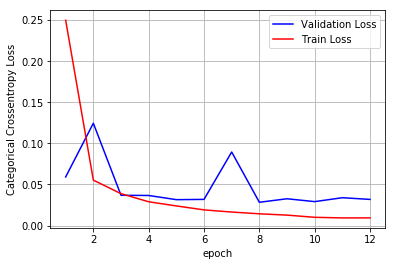

<IPython.core.display.Javascript object>

In [0]:
score34 = cnn_with_3_4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score34[0]) 
print('Test accuracy:', score34[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

x.add_row(["350-225-150(kernel(5,5))","With_dropout(0,4)" ,history34.history['acc'][11],history34.history['val_acc'][11],score34[1],history34.history['loss'][11],history34.history['val_loss'][11],score34[0]])


vy = history34.history['val_loss']
ty = history34.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.5)

In [98]:
cnn_with_3_5 = Sequential()
cnn_with_3_5.add(Conv2D(350, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_5.add(Conv2D(225, (5, 5), activation='relu'))
cnn_with_3_5.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_5.add(Dropout(0.5))
cnn_with_3_5.add(Conv2D(150, (5, 5), activation='relu'))
cnn_with_3_5.add(Dropout(0.5))
cnn_with_3_5.add(Flatten())
cnn_with_3_5.add(Dense(128, activation='relu'))
cnn_with_3_5.add(Dense(num_classes, activation='softmax'))

cnn_with_3_5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history35=cnn_with_3_5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_5.evaluate(x_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 29s 730us/step - loss: 0.2687 - acc: 0.9145 - val_loss: 0.0659 - val_acc: 0.9811
Epoch 2/12
40200/40200 [==============================] - 22s 558us/step - loss: 0.0632 - acc: 0.9803 - val_loss: 0.0740 - val_acc: 0.9772
Epoch 3/12
40200/40200 [==============================] - 23s 560us/step - loss: 0.0432 - acc: 0.9867 - val_loss: 0.2265 - val_acc: 0.9355
Epoch 4/12
40200/40200 [==============================] - 23s 563us/step - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0438 - val_acc: 0.9875
Epoch 5/12
40200/40200 [==============================] - 24s 587us/step - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0375 - val_acc: 0.9891
Epoch 6/12
40200/40200 [==============================] - 24s 587us/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0294 - val_acc: 0.9915
Epoch 7/12
40200/40200 [==============================] - 23s 575us/step - loss: 0.0202 - acc: 0.9936 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.035284401402347954
Test accuracy: 0.9916161616161616


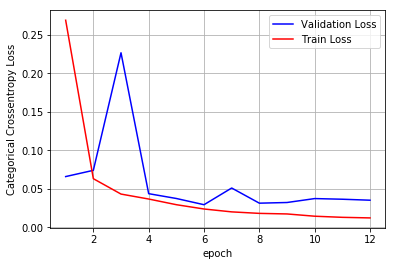

<IPython.core.display.Javascript object>

In [99]:
score35 = cnn_with_3_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score35[0]) 
print('Test accuracy:', score35[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

x.add_row(["350-225-150(kernel(5,5))","With_dropout(0.5)" ,history35.history['acc'][11],history35.history['val_acc'][11],score35[1],history35.history['loss'][11],history35.history['val_loss'][11],score35[0]])


vy = history35.history['val_loss']
ty = history35.history['loss']
plt_dynamic(l, vy, ty, ax)

with batch normalization and dropout(0.5)



In [100]:
cnn_with_3_6 = Sequential()
cnn_with_3_6.add(Conv2D(350, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_3_6.add(Conv2D(225, (5, 5), activation='relu'))
cnn_with_3_6.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_3_6.add(Dropout(0.5))
cnn_with_3_6.add(BatchNormalization())
cnn_with_3_6.add(Conv2D(150, (5, 5), activation='relu'))
cnn_with_3_6.add(Dropout(0.5))
cnn_with_3_6.add(BatchNormalization())
cnn_with_3_6.add(Flatten())
cnn_with_3_6.add(Dense(128, activation='relu'))
cnn_with_3_6.add(Dense(num_classes, activation='softmax'))

cnn_with_3_6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history36=cnn_with_3_6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_3_6.evaluate(x_cv, y_cv, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 33s 830us/step - loss: 0.1718 - acc: 0.9454 - val_loss: 0.5447 - val_acc: 0.8983
Epoch 2/12
40200/40200 [==============================] - 26s 649us/step - loss: 0.0625 - acc: 0.9814 - val_loss: 0.0613 - val_acc: 0.9854
Epoch 3/12
40200/40200 [==============================] - 26s 637us/step - loss: 0.0429 - acc: 0.9870 - val_loss: 0.0537 - val_acc: 0.9842
Epoch 4/12
40200/40200 [==============================] - 25s 627us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0484 - val_acc: 0.9858
Epoch 5/12
40200/40200 [==============================] - 25s 631us/step - loss: 0.0269 - acc: 0.9922 - val_loss: 0.0798 - val_acc: 0.9818
Epoch 6/12
40200/40200 [==============================] - 26s 634us/step - loss: 0.0230 - acc: 0.9927 - val_loss: 0.0427 - val_acc: 0.9892
Epoch 7/12
40200/40200 [==============================] - 25s 633us/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.

<IPython.core.display.Javascript object>

Test score: 0.027656820802906375
Test accuracy: 0.993030303030303


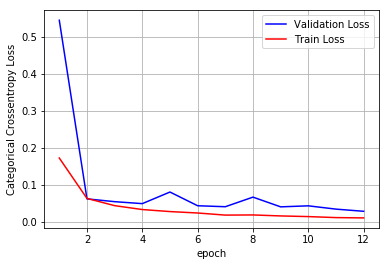

<IPython.core.display.Javascript object>

In [101]:
score36 = cnn_with_3_6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score36[0]) 
print('Test accuracy:', score36[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

x.add_row(["350-225-150(kernel(5,5))","With_bn_dropout(0.5)" ,history36.history['acc'][11],history36.history['val_acc'][11],score36[1],history36.history['loss'][11],history36.history['val_loss'][11],score36[0]])


vy = history36.history['val_loss']
ty = history36.history['loss']
plt_dynamic(l, vy, ty, ax)

In [106]:
print(x)

+--------------------------+----------------------+--------------------+---------------------+---------------+-----------------------+---------------------+----------------------+
|           CNN            |         Type         |   Train_accuracy   | validation_accuracy | Test_accuracy |       Train_loss      |   validation_loss   |      Test_loss       |
+--------------------------+----------------------+--------------------+---------------------+---------------+-----------------------+---------------------+----------------------+
| 350-225-150(kernel(3,3)) |  Without_bn_dropout  | 0.9999004975124378 |  0.9911111112074419 |     0.992     | 0.0010099540169612375 | 0.04811473159608666 | 0.037850331771943004 |
| 350-225-150(kernel(5,5)) |  Without_bn_dropout  | 0.9996517412935323 |  0.9901010099805967 |     0.9922    | 0.0013699551390893268 | 0.05361888648375323 | 0.03878844279597288  |
| 350-225-150(kernel(5,5)) |  With_dropout(0,3)   | 0.9981094527363185 |  0.9921717170513038 |     0

<IPython.core.display.Javascript object>

CNN WITH FIVE CONV LAYERS(500-400-300-200-100)

Without dropout and BatchNormalization kernel size (3,3)

In [19]:
cnn_with_5_1 = Sequential()
cnn_with_5_1.add(Conv2D(500, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_5_1.add(Conv2D(400, (3, 3), activation='relu'))
cnn_with_5_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_5_1.add(Conv2D(300, (3, 3), activation='relu'))
cnn_with_5_1.add(Conv2D(200, (3, 3), activation='relu'))
cnn_with_5_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_with_5_1.add(Conv2D(100, (3, 3), activation='relu'))
cnn_with_5_1.add(Flatten())
cnn_with_5_1.add(Dense(128, activation='relu'))
cnn_with_5_1.add(Dense(num_classes, activation='softmax'))

cnn_with_5_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history51=cnn_with_5_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 43s 1ms/step - loss: 0.3669 - acc: 0.8844 - val_loss: 0.0683 - val_acc: 0.9802
Epoch 2/12
40200/40200 [==============================] - 39s 980us/step - loss: 0.0577 - acc: 0.9820 - val_loss: 0.0478 - val_acc: 0.9853
Epoch 3/12
40200/40200 [==============================] - 40s 993us/step - loss: 0.0362 - acc: 0.9888 - val_loss: 0.0478 - val_acc: 0.9862
Epoch 4/12
40200/40200 [==============================] - 40s 1ms/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0375 - val_acc: 0.9888
Epoch 5/12
40200/40200 [==============================] - 41s 1ms/step - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0415 - val_acc: 0.9892
Epoch 6/12
40200/40200 [==============================] - 41s 1ms/step - loss: 0.0123 - acc: 0.9962 - val_loss: 0.0419 - val_acc: 0.9885
Epoch 7/12
40200/40200 [==============================] - 41s 1ms/step - loss: 0.0089 - acc: 0.9974 - val_loss: 0.0398 - val

Test score: 0.031705036375731604
Test accuracy: 0.9933


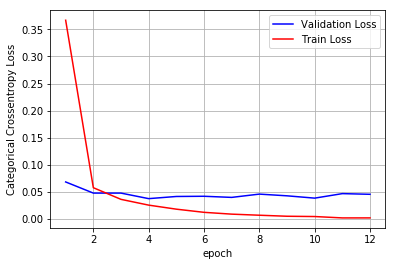

In [20]:
score51 = cnn_with_5_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score51[0]) 
print('Test accuracy:', score51[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))


vy = history51.history['val_loss']
ty = history51.history['loss']

y = PrettyTable()

y.field_names = ["CNN","Type", "Train_accuracy","validation_accuracy","Test_accuracy","Train_loss","validation_loss" ,"Test_loss"]

y.add_row(["500-400-300-200-100(kernel(3,3))","Without_bn_dropout" ,round(history51.history['acc'][11],4),np.round(history51.history['val_acc'][11],4),np.round(score51[1],4),np.round(history51.history['loss'][11],4),np.round(history51.history['val_loss'][11],4),np.round(score51[0],4)])


plt_dynamic(l, vy, ty, ax)

without dropout  and BatchNormalization,kernelsize(5,5)

In [126]:
cnn_with_5_2 = Sequential()
cnn_with_5_2.add(Conv2D(500, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_5_2.add(Conv2D(400, (5, 5), activation='relu',padding='same'))
cnn_with_5_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_2.add(Conv2D(300, (5, 5), activation='relu',padding='same'))
cnn_with_5_2.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
cnn_with_5_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_2.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
cnn_with_5_2.add(Flatten())
cnn_with_5_2.add(Dense(128, activation='relu'))
cnn_with_5_2.add(Dense(num_classes, activation='softmax'))

cnn_with_5_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history52=cnn_with_5_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 99s 2ms/step - loss: 0.4218 - acc: 0.8648 - val_loss: 3.1480 - val_acc: 0.6367
Epoch 2/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0757 - acc: 0.9793 - val_loss: 0.6044 - val_acc: 0.8300
Epoch 3/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0517 - val_acc: 0.9846
Epoch 4/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0248 - acc: 0.9923 - val_loss: 0.0409 - val_acc: 0.9872
Epoch 5/12
40200/40200 [==============================] - 89s 2ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0339 - val_acc: 0.9904
Epoch 6/12
40200/40200 [==============================] - 88s 2ms/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0609 - val_acc: 0.9848
Epoch 7/12
40200/40200 [==============================] - 88s 2ms/step - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0342 - val_acc

<IPython.core.display.Javascript object>

Test score: 0.04133084204604907
Test accuracy: 0.9928


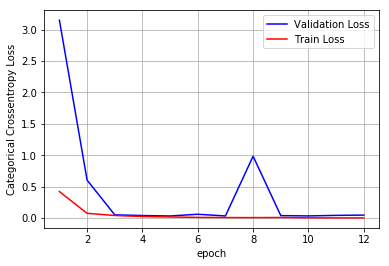

<IPython.core.display.Javascript object>

In [127]:
score52 = cnn_with_5_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score52[0]) 
print('Test accuracy:', score52[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

y.add_row(["500-400-300-200-100(kernel(5,5))","Without_bn_dropout" ,round(history52.history['acc'][11],4),np.round(history52.history['val_acc'][11],4),np.round(score52[1],4),np.round(history52.history['loss'][11],4),np.round(history52.history['val_loss'][11],4),np.round(score52[0],4)])

vy = history52.history['val_loss']
ty = history52.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.3)

In [130]:
cnn_with_5_3 = Sequential()
cnn_with_5_3.add(Conv2D(500, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_5_3.add(Conv2D(400, (5, 5), activation='relu',padding='same'))
cnn_with_5_3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_3.add(Dropout(0.3))
cnn_with_5_3.add(Conv2D(300, (5, 5), activation='relu',padding='same'))
cnn_with_5_3.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
cnn_with_5_3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_3.add(Dropout(0.3))
cnn_with_5_3.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
cnn_with_5_3.add(Flatten())
cnn_with_5_3.add(Dense(128, activation='relu'))
cnn_with_5_3.add(Dense(num_classes, activation='softmax'))

cnn_with_5_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history53=cnn_with_5_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 100s 2ms/step - loss: 0.4307 - acc: 0.8562 - val_loss: 0.0981 - val_acc: 0.9702
Epoch 2/12
40200/40200 [==============================] - 92s 2ms/step - loss: 0.0594 - acc: 0.9815 - val_loss: 0.0478 - val_acc: 0.9868
Epoch 3/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0399 - acc: 0.9882 - val_loss: 0.0346 - val_acc: 0.9899
Epoch 4/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0329 - val_acc: 0.9904
Epoch 5/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0204 - acc: 0.9940 - val_loss: 0.0313 - val_acc: 0.9905
Epoch 6/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0388 - val_acc: 0.9910
Epoch 7/12
40200/40200 [==============================] - 89s 2ms/step - loss: 0.0140 - acc: 0.9956 - val_loss: 0.0379 - val_ac

<IPython.core.display.Javascript object>

Test score: 0.026857005058267852
Test accuracy: 0.9927


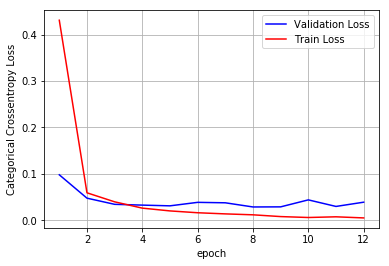

<IPython.core.display.Javascript object>

In [131]:
score53 = cnn_with_5_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score53[0]) 
print('Test accuracy:', score53[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

y.add_row(["500-400-300-200-100(kernel(5,5))","With_dropout(0.3)" ,
           round(history53.history['acc'][11],4),np.round(history53.history['val_acc'][11],4),
           np.round(score53[1],4),np.round(history53.history['loss'][11],4),
           np.round(history53.history['val_loss'][11],4),np.round(score53[0],4)])


vy = history53.history['val_loss']
ty = history53.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout(0.4)

In [132]:
cnn_with_5_4 = Sequential()
cnn_with_5_4.add(Conv2D(500, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_5_4.add(Conv2D(400, (5, 5), activation='relu',padding='same'))
cnn_with_5_4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_4.add(Dropout(0.4))
cnn_with_5_4.add(Conv2D(300, (5, 5), activation='relu',padding='same'))
cnn_with_5_4.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
cnn_with_5_4.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_4.add(Dropout(0.4))
cnn_with_5_4.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
cnn_with_5_4.add(Flatten())
cnn_with_5_4.add(Dense(128, activation='relu'))
cnn_with_5_4.add(Dense(num_classes, activation='softmax'))

cnn_with_5_4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history54=cnn_with_5_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 101s 3ms/step - loss: 0.4145 - acc: 0.8645 - val_loss: 0.0636 - val_acc: 0.9808
Epoch 2/12
40200/40200 [==============================] - 92s 2ms/step - loss: 0.0642 - acc: 0.9804 - val_loss: 0.1146 - val_acc: 0.9687
Epoch 3/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0424 - acc: 0.9867 - val_loss: 0.0435 - val_acc: 0.9881
Epoch 4/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.1274 - val_acc: 0.9716
Epoch 5/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0228 - acc: 0.9932 - val_loss: 0.0439 - val_acc: 0.9889
Epoch 6/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0330 - val_acc: 0.9905
Epoch 7/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0289 - val_ac

<IPython.core.display.Javascript object>

Test score: 0.050769331258057764
Test accuracy: 0.9886


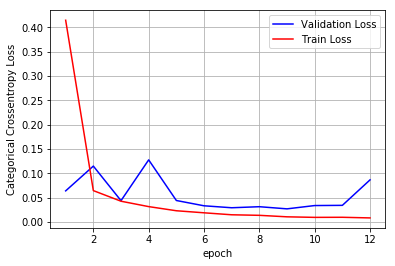

<IPython.core.display.Javascript object>

In [133]:
score54 = cnn_with_5_4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score54[0]) 
print('Test accuracy:', score54[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

y.add_row(["500-400-300-200-100(kernel(5,5))","With_dropout(0.4)" ,
           round(history54.history['acc'][11],4),np.round(history54.history['val_acc'][11],4),
           np.round(score54[1],4),np.round(history54.history['loss'][11],4),
           np.round(history54.history['val_loss'][11],4),np.round(score54[0],4)])


vy = history54.history['val_loss']
ty = history54.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.5)

In [134]:
cnn_with_5_5 = Sequential()
cnn_with_5_5.add(Conv2D(500, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_5_5.add(Conv2D(400, (5, 5), activation='relu',padding='same'))
cnn_with_5_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_5.add(Dropout(0.5))
cnn_with_5_5.add(Conv2D(300, (5, 5), activation='relu',padding='same'))
cnn_with_5_5.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
cnn_with_5_5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_5.add(Dropout(0.5))
cnn_with_5_5.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
cnn_with_5_5.add(Flatten())
cnn_with_5_5.add(Dense(128, activation='relu'))
cnn_with_5_5.add(Dense(num_classes, activation='softmax'))

cnn_with_5_5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history55=cnn_with_5_5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 100s 2ms/step - loss: 0.4522 - acc: 0.8490 - val_loss: 0.0932 - val_acc: 0.9718
Epoch 2/12
40200/40200 [==============================] - 92s 2ms/step - loss: 0.0691 - acc: 0.9798 - val_loss: 0.0394 - val_acc: 0.9871
Epoch 3/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0434 - acc: 0.9862 - val_loss: 0.0351 - val_acc: 0.9892
Epoch 4/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0303 - val_acc: 0.9920
Epoch 5/12
40200/40200 [==============================] - 91s 2ms/step - loss: 0.0260 - acc: 0.9923 - val_loss: 0.0380 - val_acc: 0.9883
Epoch 6/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0325 - val_acc: 0.9918
Epoch 7/12
40200/40200 [==============================] - 90s 2ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0284 - val_ac

<IPython.core.display.Javascript object>

Test score: 0.02101917966146916
Test accuracy: 0.9936


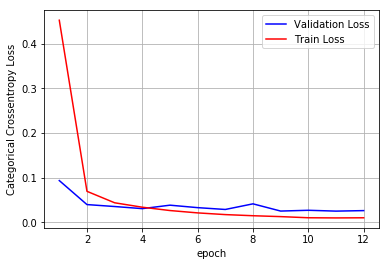

<IPython.core.display.Javascript object>

In [135]:
score55 = cnn_with_5_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score55[0]) 
print('Test accuracy:', score55[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

y.add_row(["500-400-300-200-100(kernel(5,5))","Withdropout" ,round(history55.history['acc'][11],4),
           np.round(history55.history['val_acc'][11],4),np.round(score55[1],4),
           np.round(history55.history['loss'][11],4),
           np.round(history55.history['val_loss'][11],4),np.round(score55[0],4)])


vy = history55.history['val_loss']
ty = history55.history['loss']
plt_dynamic(l, vy, ty, ax)

with batch normalization and dropout(0.5)



In [136]:
cnn_with_5_6 = Sequential()
cnn_with_5_6.add(Conv2D(500, kernel_size=(5, 5),
                activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_5_6.add(Conv2D(400, (5, 5), activation='relu',padding='same'))
cnn_with_5_6.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_6.add(Dropout(0.5))
cnn_with_5_6.add(BatchNormalization())
cnn_with_5_6.add(Conv2D(300, (5, 5), activation='relu',padding='same'))
cnn_with_5_6.add(Conv2D(200, (5, 5), activation='relu',padding='same'))
cnn_with_5_6.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_5_6.add(Dropout(0.5))
cnn_with_5_6.add(BatchNormalization())
cnn_with_5_6.add(Conv2D(100, (5, 5), activation='relu',padding='same'))
cnn_with_5_6.add(Flatten())
cnn_with_5_6.add(Dense(128, activation='relu'))
cnn_with_5_6.add(Dense(num_classes, activation='softmax'))

cnn_with_5_6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history56=cnn_with_5_6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 107s 3ms/step - loss: 0.2931 - acc: 0.9107 - val_loss: 0.3359 - val_acc: 0.9190
Epoch 2/12
40200/40200 [==============================] - 94s 2ms/step - loss: 0.0608 - acc: 0.9820 - val_loss: 0.0549 - val_acc: 0.9824
Epoch 3/12
40200/40200 [==============================] - 95s 2ms/step - loss: 0.0417 - acc: 0.9876 - val_loss: 0.0395 - val_acc: 0.9875
Epoch 4/12
40200/40200 [==============================] - 95s 2ms/step - loss: 0.0300 - acc: 0.9908 - val_loss: 0.2667 - val_acc: 0.9409
Epoch 5/12
40200/40200 [==============================] - 95s 2ms/step - loss: 0.0250 - acc: 0.9926 - val_loss: 0.0368 - val_acc: 0.9892
Epoch 6/12
40200/40200 [==============================] - 95s 2ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 7/12
40200/40200 [==============================] - 95s 2ms/step - loss: 0.0175 - acc: 0.9944 - val_loss: 0.0288 - val_ac

<IPython.core.display.Javascript object>

Test score: 0.022050600106079583
Test accuracy: 0.9942


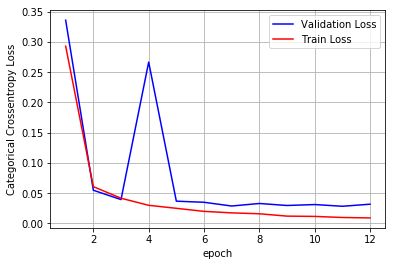

<IPython.core.display.Javascript object>

In [137]:
score56 = cnn_with_5_6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score56[0]) 
print('Test accuracy:', score56[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

y.add_row(["500-400-300-200-100(kernel(5,5))","With_bn_dropout" ,
           round(history56.history['acc'][11],4),np.round(history56.history['val_acc'][11],4),
           np.round(score56[1],4),np.round(history56.history['loss'][11],4),
           np.round(history56.history['val_loss'][11],4),np.round(score56[0],4)])


vy = history56.history['val_loss']
ty = history56.history['loss']
plt_dynamic(l, vy, ty, ax)

In [0]:
y.add_row(["500-400-300-200-100(kernel(5,5))","Without_bn_dropout",0.992,0.9921,0.9928,0.0030,0.0475,0.0413])
y.add_row(["500-400-300-200-100(kernel(5,5))","With_dropout(0.3)" ,0.9986,0.9915,0.9927,0.0053,0.0391,0.0268])
y.add_row(["500-400-300-200-100(kernel(5,5))","With_dropout(0.4)" ,0.9974,0.9838,0.9886,0.0080,0.0862,0.0507])
y.add_row(["500-400-300-200-100(kernel(5,5))","With_dropout(0.5)" ,0.9968,0.9932,0.9936,0.0098,0.0259,0.0210])
y.add_row(["500-400-300-200-100(kernel(5,5))","With_bn_dropout(0.5)" ,0.9971,0.9930,0.9942,0.0091,0.0318,0.022])


In [24]:
print(y)

+----------------------------------+----------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
|               CNN                |         Type         | Train_accuracy | validation_accuracy | Test_accuracy | Train_loss | validation_loss | Test_loss |
+----------------------------------+----------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
| 500-400-300-200-100(kernel(3,3)) |  Without_bn_dropout  |     0.9995     |        0.9914       |     0.9933    |   0.002    |      0.0455     |   0.0317  |
| 500-400-300-200-100(kernel(5,5)) |  Without_bn_dropout  |     0.992      |        0.9921       |     0.9928    |   0.003    |      0.0475     |   0.0413  |
| 500-400-300-200-100(kernel(5,5)) |  Without_bn_dropout  |     0.992      |        0.9921       |     0.9928    |   0.003    |      0.0475     |   0.0413  |
| 500-400-300-200-100(kernel(5,5)) |  With_dropout(0

CNN WITH SEVEN CONV LAYERS(256-206-156-106-84-42-24)

Without dropout and BatchNormalization kernel size (7,7)

In [25]:
cnn_with_7_1 = Sequential()
cnn_with_7_1.add(Conv2D(256, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
cnn_with_7_1.add(Conv2D(206, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_1.add(Conv2D(156, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(Conv2D(106, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_1.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
cnn_with_7_1.add(Flatten())
cnn_with_7_1.add(Dense(128, activation='relu'))
cnn_with_7_1.add(Dense(num_classes, activation='softmax'))

cnn_with_7_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history71=cnn_with_7_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_7_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 24s 601us/step - loss: 2.1015 - acc: 0.2055 - val_loss: 0.9967 - val_acc: 0.6651
Epoch 2/12
40200/40200 [==============================] - 23s 579us/step - loss: 0.2019 - acc: 0.9377 - val_loss: 0.0712 - val_acc: 0.9787
Epoch 3/12
40200/40200 [==============================] - 24s 590us/step - loss: 0.0682 - acc: 0.9809 - val_loss: 0.0472 - val_acc: 0.9867
Epoch 4/12
40200/40200 [==============================] - 24s 595us/step - loss: 0.0408 - acc: 0.9887 - val_loss: 0.0511 - val_acc: 0.9865
Epoch 5/12
40200/40200 [==============================] - 24s 600us/step - loss: 0.0268 - acc: 0.9922 - val_loss: 0.0400 - val_acc: 0.9896
Epoch 6/12
40200/40200 [==============================] - 24s 604us/step - loss: 0.0208 - acc: 0.9943 - val_loss: 0.0479 - val_acc: 0.9873
Epoch 7/12
40200/40200 [==============================] - 24s 606us/step - loss: 0.0179 - acc: 0.9947 - val_loss: 0.

Test score: 0.029885150297771633
Test accuracy: 0.9933


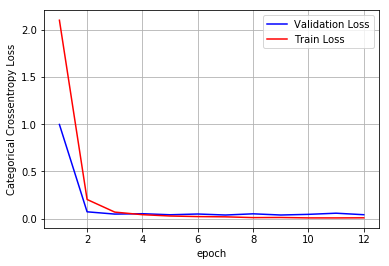

In [26]:
score71 = cnn_with_7_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score71[0]) 
print('Test accuracy:', score71[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))


vy = history71.history['val_loss']
ty = history71.history['loss']

z = PrettyTable()

z.field_names = ["CNN","Type", "Train_accuracy","validation_accuracy","Test_accuracy","Train_loss","validation_loss" ,"Test_loss"]

z.add_row(["256-206-156-106-84-42-24(kernel(7,7))","Without_bn_dropout" ,
           round(history71.history['acc'][11],4),np.round(history71.history['val_acc'][11],4),
           np.round(score71[1],4),np.round(history71.history['loss'][11],4),
           np.round(history71.history['val_loss'][11],4),np.round(score71[0],4)])


plt_dynamic(l, vy, ty, ax)

In [27]:
print(z)

+---------------------------------------+--------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
|                  CNN                  |        Type        | Train_accuracy | validation_accuracy | Test_accuracy | Train_loss | validation_loss | Test_loss |
+---------------------------------------+--------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
| 256-206-156-106-84-42-24(kernel(7,7)) | Without_bn_dropout |     0.9981     |        0.9914       |     0.9933    |   0.0076   |      0.0405     |   0.0299  |
+---------------------------------------+--------------------+----------------+---------------------+---------------+------------+-----------------+-----------+


without dropout  and BatchNormalization,kernelsize(5,5)

In [28]:
cnn_with_7_2 = Sequential()
cnn_with_7_2.add(Conv2D(256, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_7_2.add(Conv2D(206, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_7_2.add(Conv2D(156, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(Conv2D(106, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_7_2.add(Conv2D(84, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(Conv2D(42, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(Conv2D(24, (5, 5), activation='relu',padding='same'))
cnn_with_7_2.add(Flatten())
cnn_with_7_2.add(Dense(128, activation='relu'))
cnn_with_7_2.add(Dense(num_classes, activation='softmax'))

cnn_with_7_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history72=cnn_with_7_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_7_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 30s 741us/step - loss: 0.5274 - acc: 0.8299 - val_loss: 0.0747 - val_acc: 0.9773
Epoch 2/12
40200/40200 [==============================] - 29s 712us/step - loss: 0.0678 - acc: 0.9797 - val_loss: 0.0490 - val_acc: 0.9853
Epoch 3/12
40200/40200 [==============================] - 29s 716us/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0760 - val_acc: 0.9813
Epoch 4/12
40200/40200 [==============================] - 29s 720us/step - loss: 0.0308 - acc: 0.9910 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 5/12
40200/40200 [==============================] - 29s 721us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.0363 - val_acc: 0.9889
Epoch 6/12
40200/40200 [==============================] - 29s 724us/step - loss: 0.0159 - acc: 0.9953 - val_loss: 0.0377 - val_acc: 0.9900
Epoch 7/12
40200/40200 [==============================] - 29s 719us/step - loss: 0.0114 - acc: 0.9965 - val_loss: 0.

Test score: 0.033921464016994016
Test accuracy: 0.9919


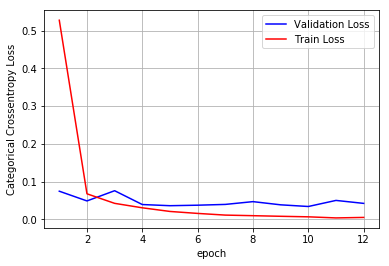

In [29]:
score72 = cnn_with_7_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score72[0]) 
print('Test accuracy:', score72[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

z.add_row(["256-206-156-106-84-42-24(kernel(5,5))","Without_bn_dropout" ,
           round(history72.history['acc'][11],4),np.round(history72.history['val_acc'][11],4),
           np.round(score72[1],4),np.round(history72.history['loss'][11],4),
           np.round(history72.history['val_loss'][11],4),np.round(score72[0],4)])

vy = history72.history['val_loss']
ty = history72.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.3)

In [30]:
cnn_with_7_3 = Sequential()
cnn_with_7_3.add(Conv2D(256, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_7_3.add(Conv2D(206, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_3.add(Dropout(0.3))
cnn_with_7_3.add(Conv2D(156, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(Conv2D(106, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_3.add(Dropout(0.3))
cnn_with_7_3.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_3.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
cnn_with_7_3.add(Flatten())
cnn_with_7_3.add(Dense(128, activation='relu'))
cnn_with_7_3.add(Dense(num_classes, activation='softmax'))

cnn_with_7_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history53=cnn_with_7_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_7_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 66s 2ms/step - loss: 2.3017 - acc: 0.1104 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 2/12
40200/40200 [==============================] - 66s 2ms/step - loss: 2.2996 - acc: 0.1163 - val_loss: 2.3005 - val_acc: 0.1120
Epoch 3/12
40200/40200 [==============================] - 67s 2ms/step - loss: 1.5833 - acc: 0.4072 - val_loss: 0.7954 - val_acc: 0.7829
Epoch 4/12
40200/40200 [==============================] - 68s 2ms/step - loss: 0.1789 - acc: 0.9500 - val_loss: 0.1359 - val_acc: 0.9662
Epoch 5/12
40200/40200 [==============================] - 69s 2ms/step - loss: 0.0759 - acc: 0.9780 - val_loss: 0.2702 - val_acc: 0.9213
Epoch 6/12
40200/40200 [==============================] - 69s 2ms/step - loss: 0.0517 - acc: 0.9856 - val_loss: 0.0417 - val_acc: 0.9887
Epoch 7/12
40200/40200 [==============================] - 69s 2ms/step - loss: 0.0398 - acc: 0.9888 - val_loss: 0.0422 - val_acc

Test score: 0.0291771018157091
Test accuracy: 0.9931


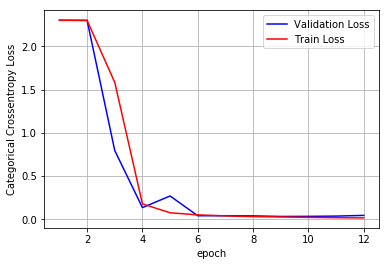

In [33]:
history73=history53
score73 = cnn_with_7_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score73[0]) 
print('Test accuracy:', score73[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

z.add_row(["256-206-156-106-84-42-24(kernel(7,7))","With_dropout(0.3)" ,
           round(history73.history['acc'][11],4),np.round(history73.history['val_acc'][11],4),
           np.round(score73[1],4),np.round(history73.history['loss'][11],4),
           np.round(history73.history['val_loss'][11],4),np.round(score73[0],4)])


vy = history73.history['val_loss']
ty = history73.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout(0.4)

In [34]:
cnn_with_7_4 = Sequential()
cnn_with_7_4.add(Conv2D(256, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_7_4.add(Conv2D(206, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_4.add(Dropout(0.4))
cnn_with_7_4.add(Conv2D(156, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(Conv2D(106, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_4.add(Dropout(0.4))
cnn_with_7_4.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_4.add(Dropout(0.4))
cnn_with_7_4.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
cnn_with_7_4.add(Flatten())
cnn_with_7_4.add(Dense(128, activation='relu'))
cnn_with_7_4.add(Dense(num_classes, activation='softmax'))

cnn_with_7_4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history74=cnn_with_7_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_7_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 68s 2ms/step - loss: 2.3017 - acc: 0.1110 - val_loss: 2.3014 - val_acc: 0.1120
Epoch 2/12
40200/40200 [==============================] - 67s 2ms/step - loss: 2.3004 - acc: 0.1157 - val_loss: 2.3014 - val_acc: 0.1120
Epoch 3/12
40200/40200 [==============================] - 69s 2ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 4/12
40200/40200 [==============================] - 70s 2ms/step - loss: 2.3013 - acc: 0.1125 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 5/12
40200/40200 [==============================] - 69s 2ms/step - loss: 2.3005 - acc: 0.1140 - val_loss: 2.3011 - val_acc: 0.1120
Epoch 6/12
40200/40200 [==============================] - 70s 2ms/step - loss: 2.2985 - acc: 0.1168 - val_loss: 2.3017 - val_acc: 0.1120
Epoch 7/12
40200/40200 [==============================] - 69s 2ms/step - loss: 2.2907 - acc: 0.1211 - val_loss: 2.0744 - val_acc

Test score: 0.06778733874528443
Test accuracy: 0.9849


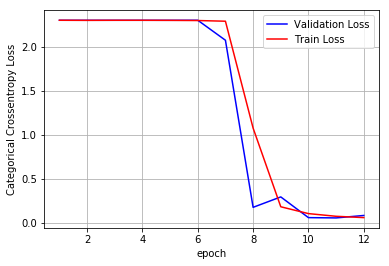

In [35]:
score74 = cnn_with_7_4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score74[0]) 
print('Test accuracy:', score74[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

z.add_row(["256-206-156-106-84-42-24(kernel(5,5))","With_dropout(0.4)" ,
           round(history74.history['acc'][11],4),np.round(history74.history['val_acc'][11],4),
           np.round(score74[1],4),np.round(history74.history['loss'][11],4),
           np.round(history74.history['val_loss'][11],4),np.round(score74[0],4)])


vy = history74.history['val_loss']
ty = history74.history['loss']
plt_dynamic(l, vy, ty, ax)

with dropout rate(0.5)

In [36]:
cnn_with_7_5 = Sequential()
cnn_with_7_5.add(Conv2D(256, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_7_5.add(Conv2D(206, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_5.add(Dropout(0.5))
cnn_with_7_5.add(Conv2D(156, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(Conv2D(106, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_5.add(Dropout(0.5))
cnn_with_7_5.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
cnn_with_7_5.add(Dropout(0.5))
cnn_with_7_5.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
cnn_with_7_5.add(Flatten())
cnn_with_7_5.add(Dense(128, activation='relu'))
cnn_with_7_5.add(Dense(num_classes, activation='softmax'))

cnn_with_7_5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history55=cnn_with_7_5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_5_5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 67s 2ms/step - loss: 2.3016 - acc: 0.1117 - val_loss: 2.3013 - val_acc: 0.1120
Epoch 2/12
40200/40200 [==============================] - 65s 2ms/step - loss: 2.3006 - acc: 0.1162 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 3/12
40200/40200 [==============================] - 66s 2ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 4/12
40200/40200 [==============================] - 67s 2ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3013 - val_acc: 0.1120
Epoch 5/12
40200/40200 [==============================] - 67s 2ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 6/12
40200/40200 [==============================] - 67s 2ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3012 - val_acc: 0.1120
Epoch 7/12
40200/40200 [==============================] - 68s 2ms/step - loss: 2.3013 - acc: 0.1125 - val_loss: 2.3013 - val_acc

Test score: 2.3010415908813475
Test accuracy: 0.1135


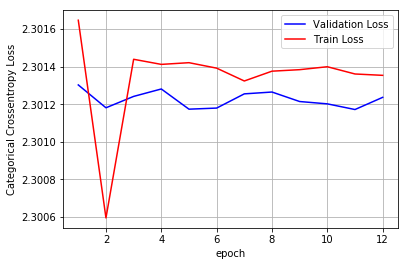

In [39]:
score55 = cnn_with_5_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score75[0]) 
print('Test accuracy:', score75[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

z.add_row(["500-400-300-200-100(kernel(5,5))","Withdropout" ,round(history55.history['acc'][11],4),
           np.round(history55.history['val_acc'][11],4),np.round(score55[1],4),
           np.round(history55.history['loss'][11],4),
           np.round(history55.history['val_loss'][11],4),np.round(score55[0],4)])


vy = history55.history['val_loss']
ty = history55.history['loss']
plt_dynamic(l, vy, ty, ax)

with batch normalization and dropout(0.3)



In [45]:
from keras.layers.normalization import BatchNormalization
cnn_with_7_6 = Sequential()
cnn_with_7_6.add(Conv2D(256, kernel_size=(5, 5),
                activation='relu',
                 input_shape=input_shape,padding='same'))
cnn_with_7_6.add(Conv2D(206, (5, 5), activation='relu',padding='same'))
cnn_with_7_6.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_7_6.add(Dropout(0.3))
cnn_with_7_6.add(BatchNormalization())
cnn_with_7_6.add(Conv2D(156, (5, 5), activation='relu',padding='same'))
cnn_with_7_6.add(Conv2D(106, (5, 5), activation='relu',padding='same'))
cnn_with_7_6.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_with_7_6.add(Dropout(0.3))
cnn_with_7_6.add(BatchNormalization())
cnn_with_7_6.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
cnn_with_7_6.add(Conv2D(48, (7, 7), activation='relu',padding='same'))
cnn_with_7_6.add(Dropout(0.3))
cnn_with_7_6.add(BatchNormalization())
cnn_with_7_6.add(Conv2D(24, (7, 7), activation='relu',padding='same'))
cnn_with_7_6.add(Flatten())
cnn_with_7_6.add(Dense(128, activation='relu'))
cnn_with_7_6.add(Dense(num_classes, activation='softmax'))

cnn_with_7_6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history76=cnn_with_7_6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_cv, y_cv))
score = cnn_with_7_6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40200 samples, validate on 19800 samples
Epoch 1/12
40200/40200 [==============================] - 34s 834us/step - loss: 0.2387 - acc: 0.9225 - val_loss: 0.1545 - val_acc: 0.9658
Epoch 2/12
40200/40200 [==============================] - 31s 764us/step - loss: 0.0612 - acc: 0.9814 - val_loss: 0.0406 - val_acc: 0.9885
Epoch 3/12
40200/40200 [==============================] - 31s 772us/step - loss: 0.0408 - acc: 0.9878 - val_loss: 0.3597 - val_acc: 0.9286
Epoch 4/12
40200/40200 [==============================] - 31s 782us/step - loss: 0.0319 - acc: 0.9908 - val_loss: 0.0917 - val_acc: 0.9751
Epoch 5/12
40200/40200 [==============================] - 32s 788us/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0642 - val_acc: 0.9854
Epoch 6/12
40200/40200 [==============================] - 32s 792us/step - loss: 0.0202 - acc: 0.9940 - val_loss: 0.0319 - val_acc: 0.9925
Epoch 7/12
40200/40200 [==============================] - 32s 797us/step - loss: 0.0170 - acc: 0.9946 - val_loss: 0.

Test score: 0.03858854297724493
Test accuracy: 0.9917


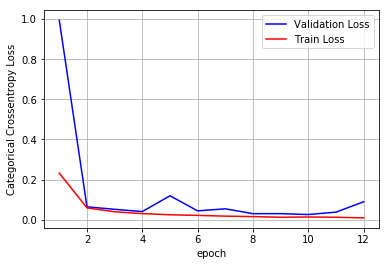

In [46]:
score76 = cnn_with_7_6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
l = list(range(1,epochs+1))

z.add_row(["500-400-300-200-100(kernel(7,7))","With_bn_dropout(0.3)" ,
           round(history76.history['acc'][11],4),np.round(history76.history['val_acc'][11],4),
           np.round(score76[1],4),np.round(history76.history['loss'][11],4),
           np.round(history76.history['val_loss'][11],4),np.round(score76[0],4)])


vy = history56.history['val_loss']
ty = history56.history['loss']
plt_dynamic(l, vy, ty, ax)

In [47]:
print(z)

+---------------------------------------+----------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
|                  CNN                  |         Type         | Train_accuracy | validation_accuracy | Test_accuracy | Train_loss | validation_loss | Test_loss |
+---------------------------------------+----------------------+----------------+---------------------+---------------+------------+-----------------+-----------+
| 256-206-156-106-84-42-24(kernel(7,7)) |  Without_bn_dropout  |     0.9981     |        0.9914       |     0.9933    |   0.0076   |      0.0405     |   0.0299  |
| 256-206-156-106-84-42-24(kernel(5,5)) |  Without_bn_dropout  |     0.9984     |        0.992        |     0.9919    |   0.0053   |      0.0425     |   0.0339  |
| 256-206-156-106-84-42-24(kernel(7,7)) |  With_dropout(0.3)   |     0.9956     |         0.99        |     0.9931    |   0.0166   |      0.0458     |   0.0292  |
| 256-206-156-106-84-4

# **Conclusions**

 Tried 3 different MLP arcitures on MNIST dataset

  1. All models are giving best results except the models without dropouts are slightly overfit to the traindata.

  2. Models with Dropout are giving good performance.
  
  3.I tried different dropout rates with each architecture,for 3 layered and 5 layered dropout rate 0.5 is giving 
  best   results.for 7 layered architecture dropout rate 0.3 is giving best performance.model with 7 layers with 0.5
  dropout is giving very bad results.hence we neglect that model.

  4. As hidden layers are increasing even with the dropouts also the performance of the model is decreasing.

  5.  Represented the  all three architectures results using prettytable library.